In [26]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
book_names = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        book_names.append(os.path.join(dirname, filename))
for book in book_names:
    print(book) 
    # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/project-gutenbergs-top-20-books/The_Adventures_of_Tom_Sawyer_by_Mark_Twain.rtf
/kaggle/input/project-gutenbergs-top-20-books/The_Romance_of_Lust_by_Anonymous.rtf
/kaggle/input/project-gutenbergs-top-20-books/The_Prince_by_Nicolo_Machiavelli.rtf
/kaggle/input/project-gutenbergs-top-20-books/Alices_Adventures_in_Wonderland_by_Lewis_Carroll.rtf
/kaggle/input/project-gutenbergs-top-20-books/Ulysses_by_James_Joyce.rtf
/kaggle/input/project-gutenbergs-top-20-books/Emma_by_Jane_Austen.rtf
/kaggle/input/project-gutenbergs-top-20-books/The_Adventures_of_Sherlock_Holmes_by_Arthur_Conan_Doyle.rtf
/kaggle/input/project-gutenbergs-top-20-books/The_Count_of_Monte_Cristo_by_Alexandre_Dumas.rtf
/kaggle/input/project-gutenbergs-top-20-books/The_Importance_of_Being_Earnest_by_Oscar_Wilde.rtf
/kaggle/input/project-gutenbergs-top-20-books/Adventures_of_Huckleberry_Finn_by_Mark_Twain.rtf
/kaggle/input/project-gutenbergs-top-20-books/Metamorphosis_by_Franz_Kafka.rtf
/kaggle/input/project-guten

In [27]:
# conda install -c conda-forge sentence-transformers


In [28]:
# import warnings
# warnings.filterwarnings('error', category=DeprecationWarning)


In [29]:
import torch
from transformers import BertModel
from transformers import BertTokenizerFast
from transformers import AutoModelForCausalLM, AutoTokenizer
from transformers import BartForConditionalGeneration, BartTokenizer



import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from torch.nn import functional as F

import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np


In [30]:

tokenizers = [BertTokenizerFast.from_pretrained("bert-base-uncased"), 
              BertTokenizerFast.from_pretrained("bert-base-cased"),
              BertTokenizerFast.from_pretrained("bert-base-multilingual-cased"), 
              BartTokenizer.from_pretrained("facebook/bart-large"),
              AutoTokenizer.from_pretrained("gpt2")
             ]
models = [BertModel.from_pretrained("bert-base-uncased"),
          BertModel.from_pretrained("bert-base-cased"),
          BertModel.from_pretrained("bert-base-multilingual-cased"), 
          BartForConditionalGeneration.from_pretrained("facebook/bart-large", forced_bos_token_id=0),
          AutoModelForCausalLM.from_pretrained("gpt2")
         ]

for t in tokenizers:
    print(t.name_or_path)

for m in models:
    print(type(m).__name__)

bert-base-uncased
bert-base-cased
bert-base-multilingual-cased
facebook/bart-large
gpt2
BertModel
BertModel
BertModel
BartForConditionalGeneration
GPT2LMHeadModel



Total number of tokens processed: 4345349

Most common words:
\: 392361
[CLS]: 284708
[SEP]: 284708
,: 192414
.: 130819
the: 123807
': 101164
and: 80261
to: 66893
of: 63000
log_log_bert-base-uncased.png

Linear regression on log-log data:
Slope: -1.1621
Intercept: 13.6969
R-squared: 0.9976

Total number of tokens processed: 4459519

Most common words:
\: 392361
[CLS]: 284708
[SEP]: 284708
,: 192414
.: 130819
the: 115045
': 101164
and: 77422
to: 66261
of: 62397
log_log_bert-base-cased.png

Linear regression on log-log data:
Slope: -1.1149
Intercept: 13.5380
R-squared: 0.9979

Total number of tokens processed: 4652065

Most common words:
\: 392361
[CLS]: 284708
[SEP]: 284708
,: 192414
.: 130819
the: 115176
': 101164
and: 77421
to: 66264
of: 62390
log_log_bert-base-multilingual-cased.png

Linear regression on log-log data:
Slope: -1.0768
Intercept: 13.4408
R-squared: 0.9978

Total number of tokens processed: 4280256

Most common words:
\: 288975
<s>: 284708
</s>: 284708
,: 189961
.: 1210

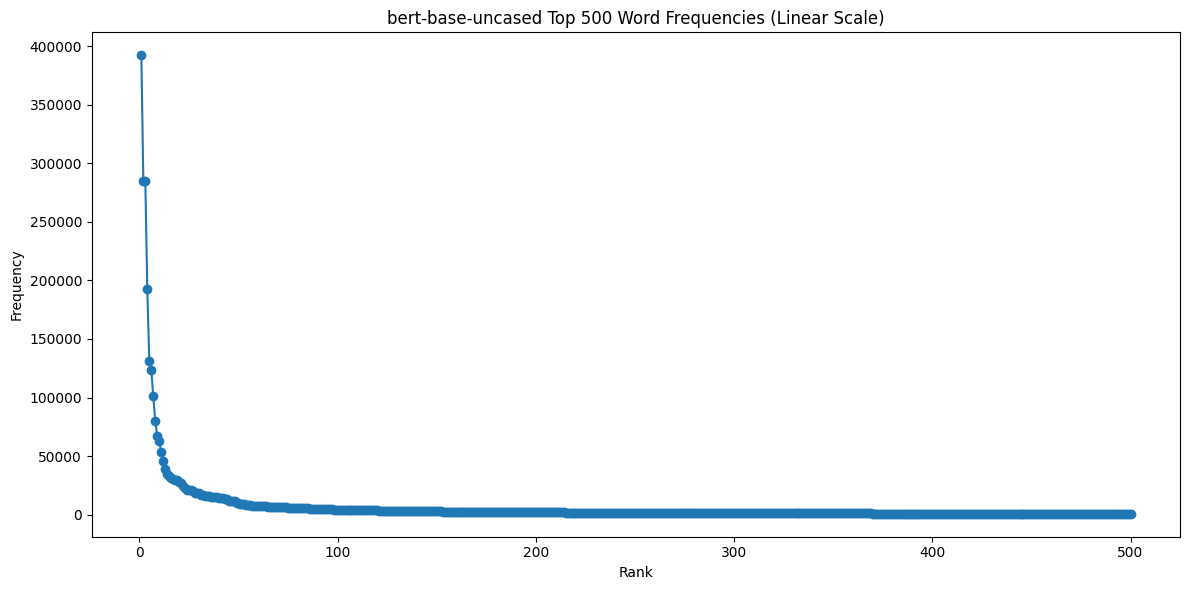

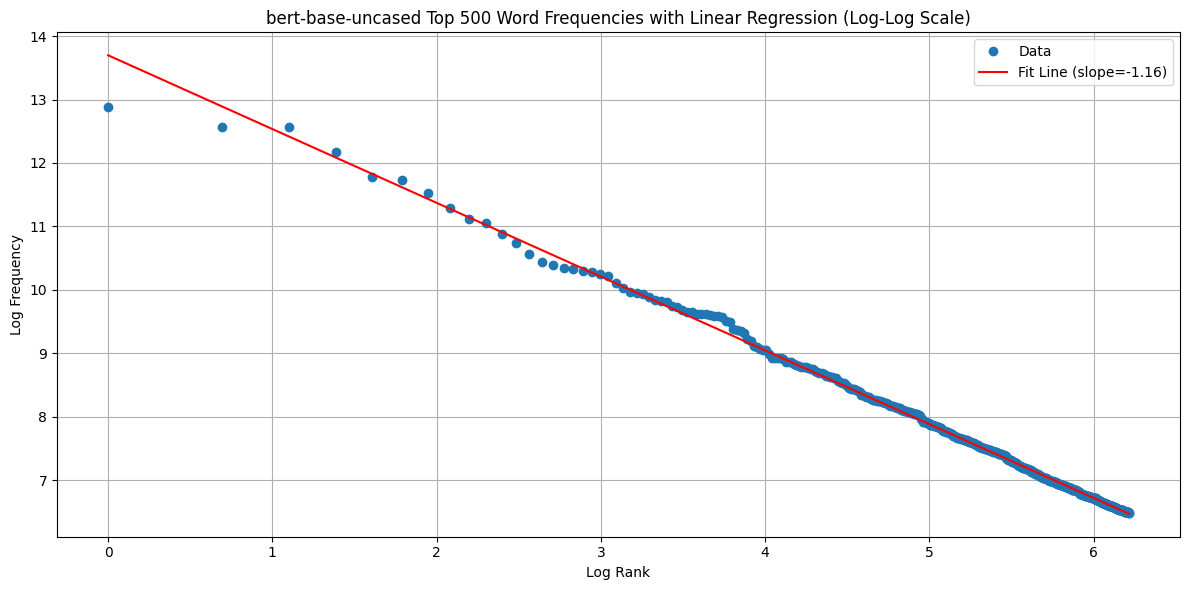

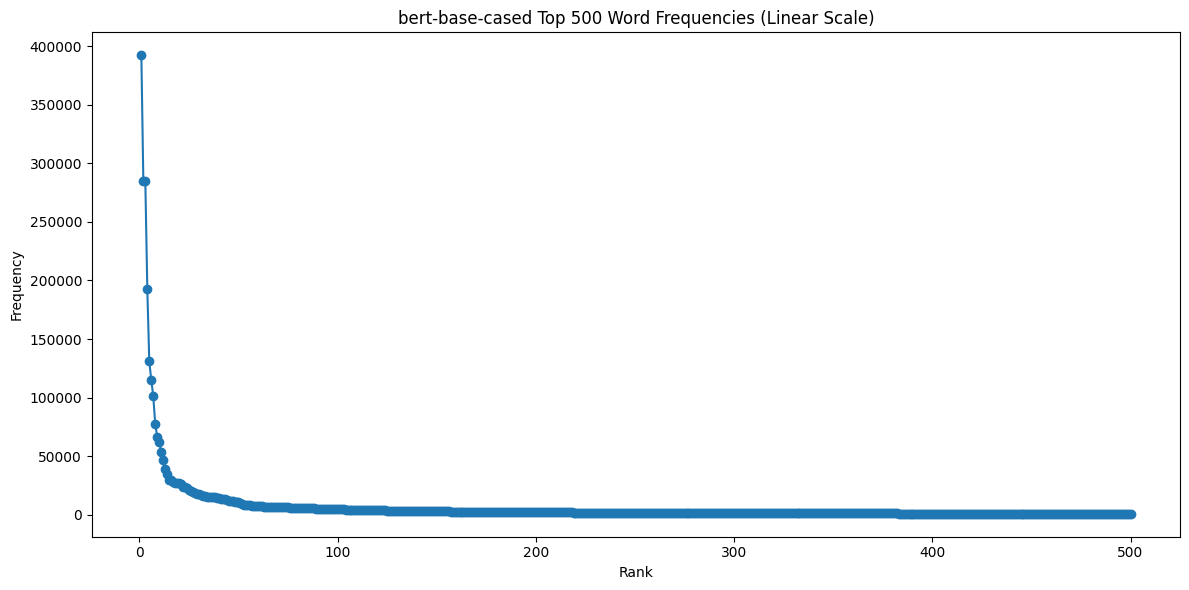

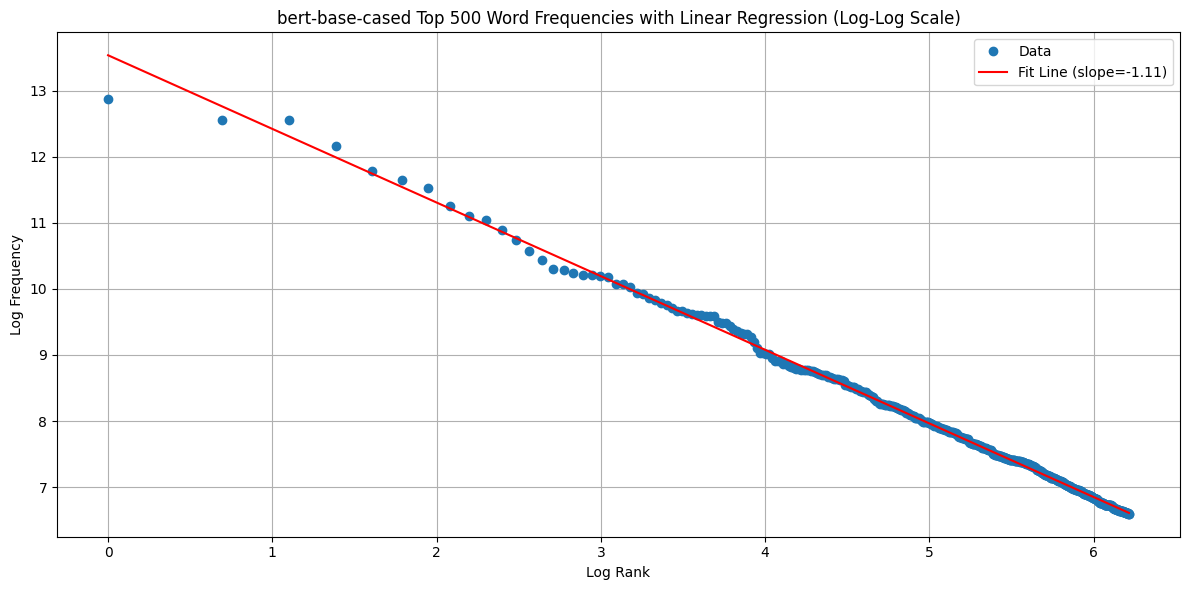

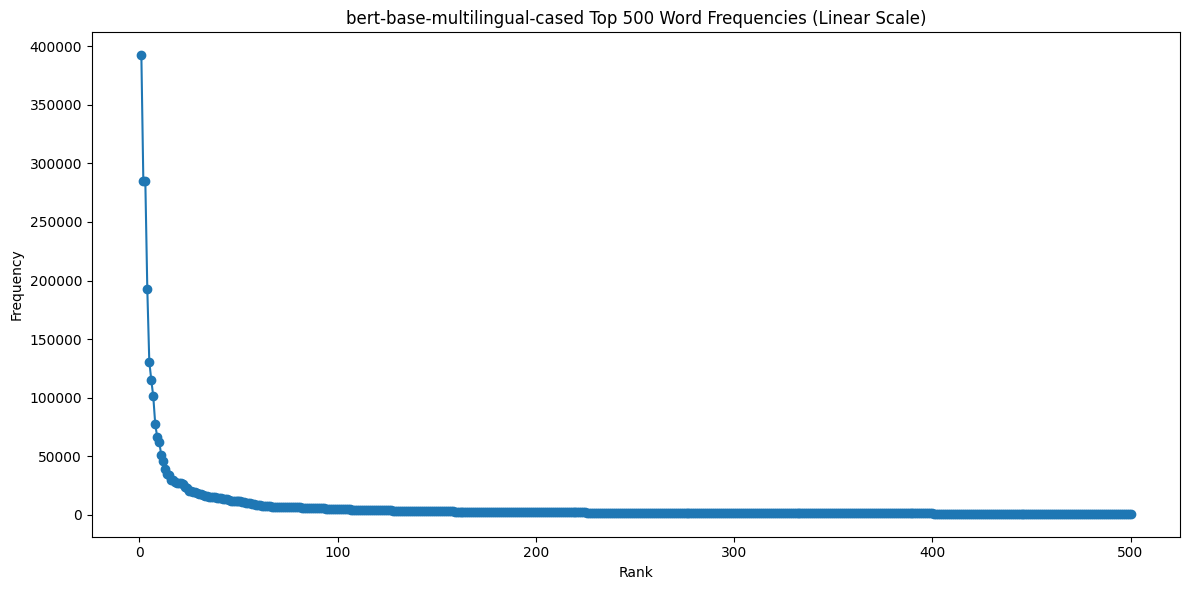

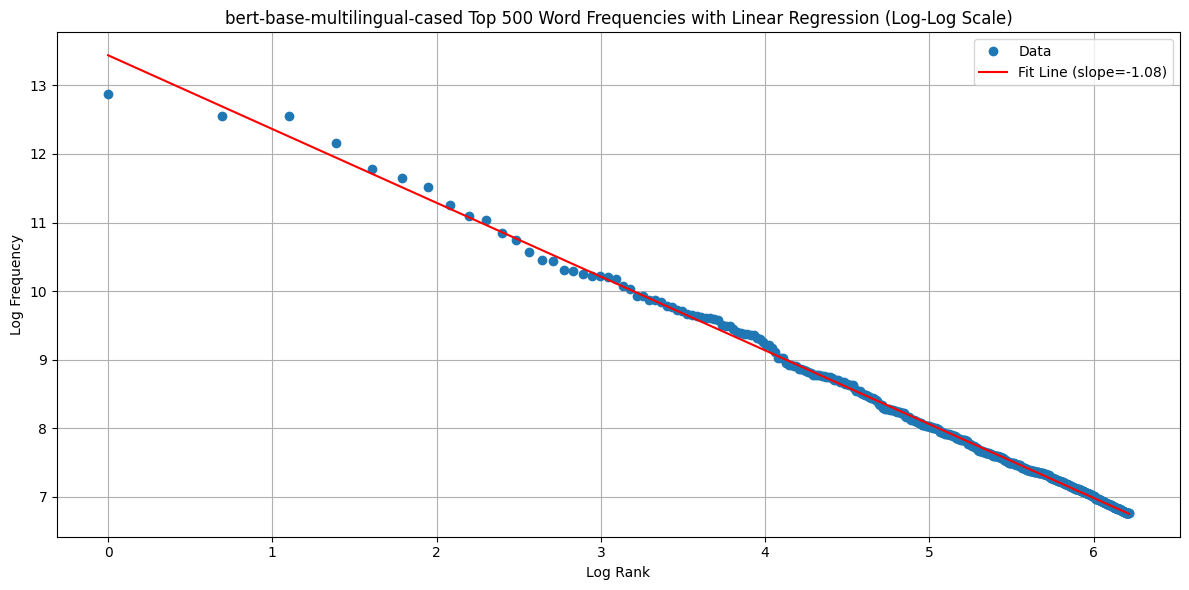

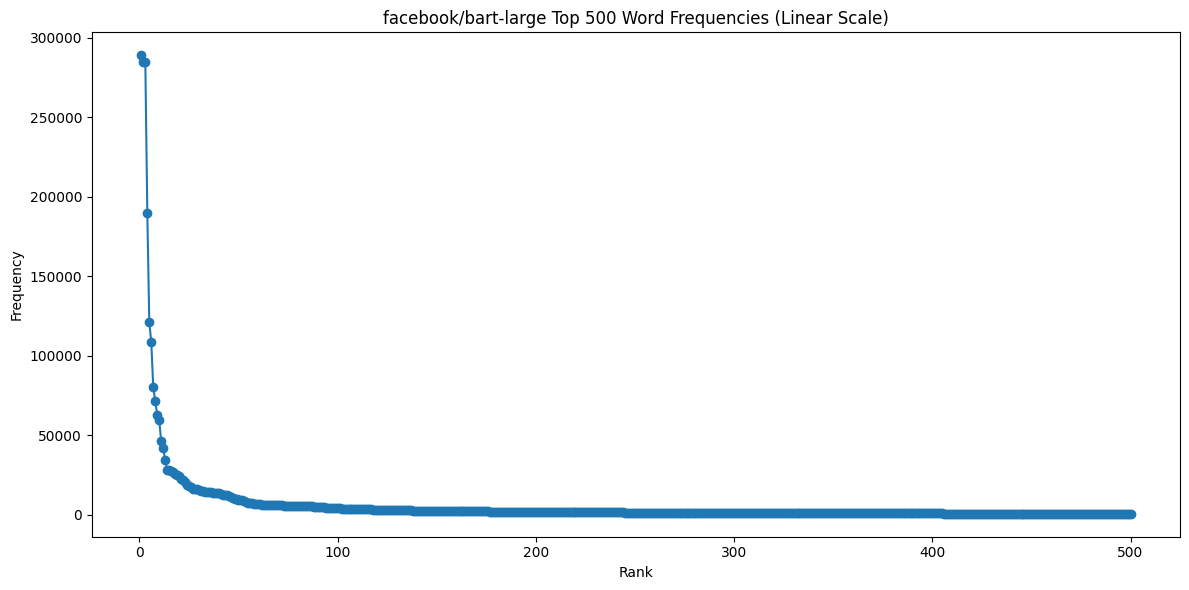

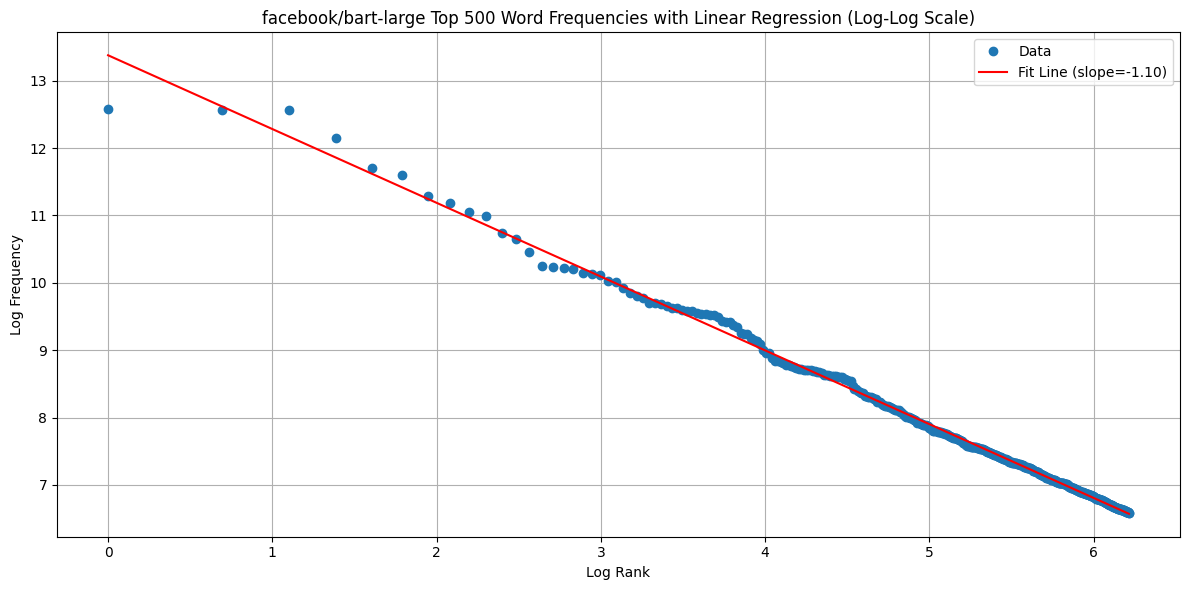

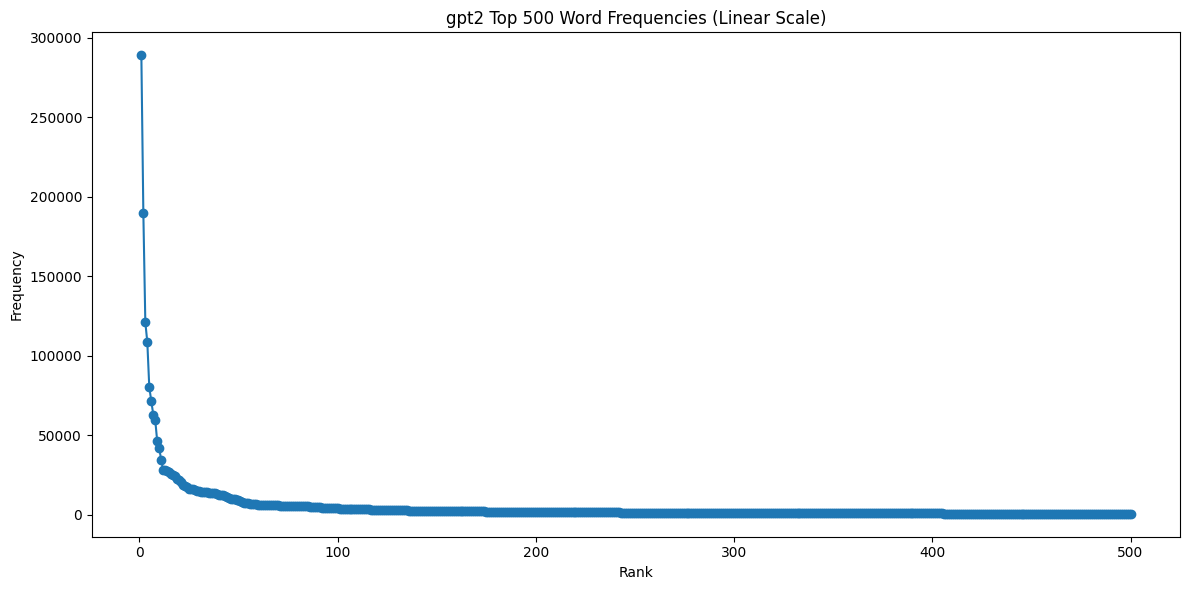

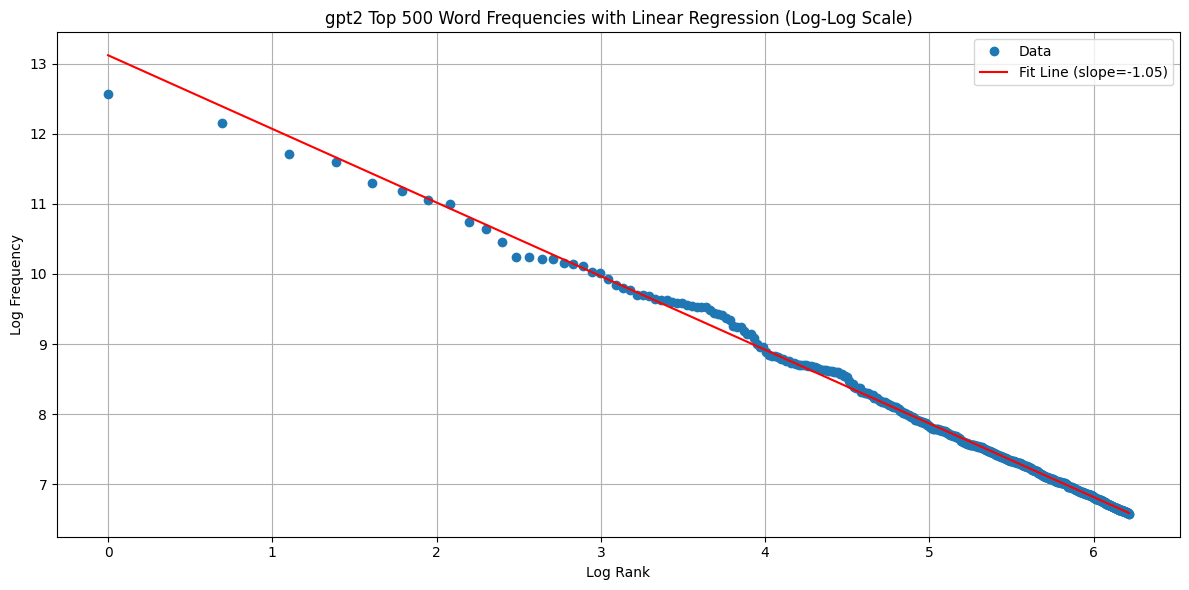

In [31]:



# Set the number of lines to process
N = 100000  # Adjust this number based on your computational resources

# Set the number of top words to plot
K = 500  # You can change this number to plot more or fewer top words

# Initialize a Counter to hold word counts

# Process the text file
corpus_raw = u""
for tokenizer in tokenizers:
    token_counts = Counter()

    for book_filename in book_names:
    
        with open(book_filename, 'r', encoding='utf-8') as f:
            for i, line in enumerate(f):
                # For large files, limit the number of lines processed
                if i >= N:
                    break
                # Remove leading/trailing whitespace
                line = line.strip()
                # Skip empty lines
                if not line:
                    continue
    
                encoded_input = tokenizer(line)["input_ids"]
                token_counts.update(encoded_input)
    
                # Print progress every 100,000 lines
                if (i + 1) % 100000 == 0:
                    print(f"Processed {i + 1} lines.")
    
    # Calculate the total number of tokens
    total_tokens = sum(token_counts.values())
    
    # Print the total token count
    print(f"\nTotal number of tokens processed: {total_tokens}")
    
    
    # Plot frequency vs. rank for the top K words
    top_k_tokens = token_counts.most_common(K)
    
    tokens, frequencies = zip(*top_k_tokens)
    words = tokenizer.convert_ids_to_tokens(tokens, skip_special_tokens=False)
    ranks = np.arange(1, K + 1)
    
    # Print the most common words
    print("\nMost common words:")
    for word, freq in token_counts.most_common(10):
        print(f"{tokenizer.convert_ids_to_tokens(word, skip_special_tokens=False)}: {freq}")
    
    
    # Plot frequency vs. rank (Linear Scale)
    plt.figure(figsize=(12, 6))
    plt.plot(ranks, frequencies, marker='o')
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.title(f'{tokenizer.name_or_path} Top {K} Word Frequencies (Linear Scale)')
    # plt.xticks(ranks, words, rotation='vertical')
    plt.tight_layout()
    # plt.show()
    plt_name = "word_freq_" + tokenizer.name_or_path.replace("/", "-") + ".png"
    plt.savefig(plt_name, bbox_inches='tight')
    
    
    # Log-log plot with linear regression
    # Compute the logarithms of ranks and frequencies
    log_ranks = np.log(ranks)
    log_frequencies = np.log(frequencies)
    
    # Perform linear regression on the log-log data
    slope, intercept = np.polyfit(log_ranks, log_frequencies, 1)
    
    # Generate points for the regression line
    regression_line = intercept + slope * log_ranks
    
    # Compute R-squared manually
    ss_res = np.sum((log_frequencies - regression_line) ** 2)
    ss_tot = np.sum((log_frequencies - np.mean(log_frequencies)) ** 2)
    r_squared = 1 - (ss_res / ss_tot)
    
    # Plot the log-log data and the regression line
    plt.figure(figsize=(12, 6))
    plt.plot(log_ranks, log_frequencies, marker='o', linestyle='None', label='Data')
    plt.plot(log_ranks, regression_line, color='red', label=f'Fit Line (slope={slope:.2f})')
    plt.xlabel('Log Rank')
    plt.ylabel('Log Frequency')
    plt.title(f'{tokenizer.name_or_path} Top {K} Word Frequencies with Linear Regression (Log-Log Scale)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt_name = "log_log_" + tokenizer.name_or_path.replace("/", "-") + ".png"

    plt.savefig(plt_name, bbox_inches='tight')
    
    # plt.show()
    
    # Print the slope, intercept, and R-squared
    print(plt_name)
    print(f"\nLinear regression on log-log data:")
    print(f"Slope: {slope:.4f}")
    print(f"Intercept: {intercept:.4f}")
    print(f"R-squared: {r_squared:.4f}")

In [32]:
model = BertModel.from_pretrained("bert-base-uncased")
tokenizer = BertTokenizerFast.from_pretrained('bert-base-cased')
token_counts = Counter()
for book_filename in book_names:

    with open(book_filename, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            # For large files, limit the number of lines processed
            if i >= N:
                break
            # Remove leading/trailing whitespace
            line = line.strip()
            # Skip empty lines
            if not line:
                continue

            encoded_input = tokenizer(line)["input_ids"]
            token_counts.update(encoded_input)

            # Print progress every 100,000 lines
            if (i + 1) % 100000 == 0:
                print(f"Processed {i + 1} lines.")
# Calculate the total number of tokens
total_tokens = sum(token_counts.values())

# Print the total token count
print(f"\nTotal number of tokens processed: {total_tokens}")


# Plot frequency vs. rank for the top K words
top_k_tokens = token_counts.most_common(K)

tokens, frequencies = zip(*top_k_tokens)
words = tokenizer.convert_ids_to_tokens(tokens, skip_special_tokens=False)
ranks = np.arange(1, K + 1)

# Print the most common words
print("\nMost common words:")
for word, freq in token_counts.most_common(10):
    print(f"{tokenizer.convert_ids_to_tokens(word, skip_special_tokens=False)}: {freq}")

    


Total number of tokens processed: 4459519

Most common words:
\: 392361
[CLS]: 284708
[SEP]: 284708
,: 192414
.: 130819
the: 115045
': 101164
and: 77422
to: 66261
of: 62397


0.5395678


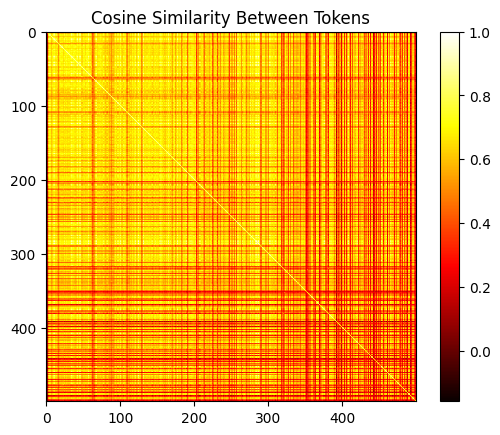

In [33]:
embeddings = model.embeddings.word_embeddings(torch.tensor(tokens))
cosine_similarity = F.cosine_similarity(embeddings[None,:,:], embeddings[:,None,:], dim=-1)
array_to_plot = cosine_similarity.detach().numpy()

# Plot the heatmap
plt.imshow(array_to_plot, cmap='hot')
plt.title("Cosine Similarity Between Tokens")
plt.colorbar()
plt.savefig("cosine_rank_order", bbox_inches='tight')

print(np.mean(array_to_plot))

In [34]:
# find pattern in cosine similarity
from collections import deque
from tqdm import tqdm 
# first take the cosine similarity between every word in the column
# intitialize 
min_dist = np.inf
edge1 = None
edge2 = None
for i in range(array_to_plot.shape[0]):
    for j in range(i + 1, array_to_plot.shape[0]):
        a = array_to_plot[i]
        b = array_to_plot[j]
        cos_sim_sq = (np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b)))**2
        if cos_sim_sq < min_dist:
            min_dist = cos_sim_sq
            edge1 = i
            edge2 = j
new_rows = deque([edge1, edge2])

for iteration in tqdm(range(array_to_plot.shape[0] - 2)):
    min_dist = 10
    min_row = None
    side = None
    a = array_to_plot[new_rows[0]]
    b = array_to_plot[new_rows[-1]]
    for i in range(array_to_plot.shape[0]):
        if i not in new_rows:
            c = array_to_plot[i]
            cos_sim_sq_1 = (np.dot(a, c)/(np.linalg.norm(a)*np.linalg.norm(c)))**2
            cos_sim_sq_2 = (np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b)))**2
            if min(cos_sim_sq_1, cos_sim_sq_2) < min_dist:
                if cos_sim_sq_1 < cos_sim_sq_2: 
                    min_dist = cos_sim_sq_1
                    min_row = i
                    side = 0
                else:
                    min_dist = cos_sim_sq_2
                    min_row = i
                    side = -1
    if side == 0:
        new_rows.appendleft(min_row)
    else:
        new_rows.append(min_row)
# plt.imshow(array_to_plot[[edge1, edge2], :], cmap='hot')
# plt.colorbar()
# plt.show()
print()

100%|██████████| 498/498 [00:03<00:00, 126.02it/s]

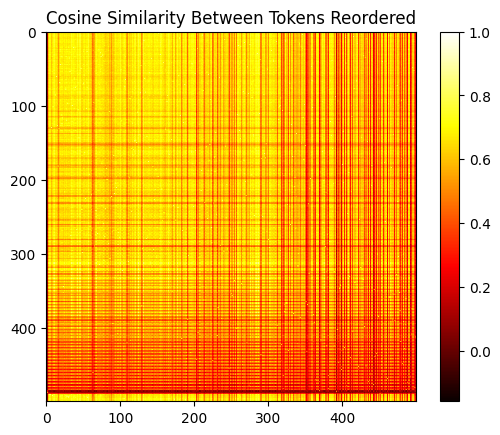

In [35]:
new_ordered_image = array_to_plot[new_rows, :]
plt.imshow(new_ordered_image, cmap='hot')
plt.title("Cosine Similarity Between Tokens Reordered")
plt.colorbar()
plt.savefig("cosine_unshredded", bbox_inches='tight')


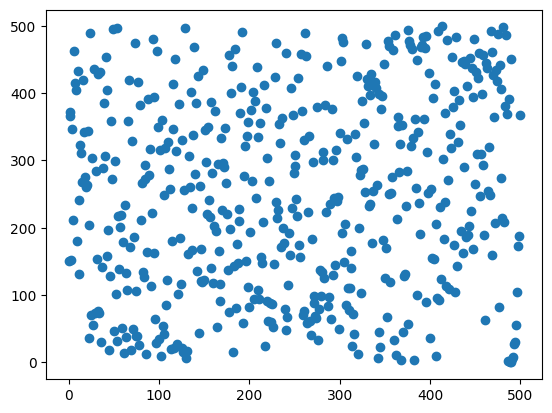

In [36]:
plt.scatter(np.arange(500), new_rows)
plt.savefig("unshredded_order.png", bbox_inches='tight')


In [37]:
# cosines = array_to_plot.flatten()
# cosines.sort()
# print(cosines.shape)

0.5395678
0.042308077


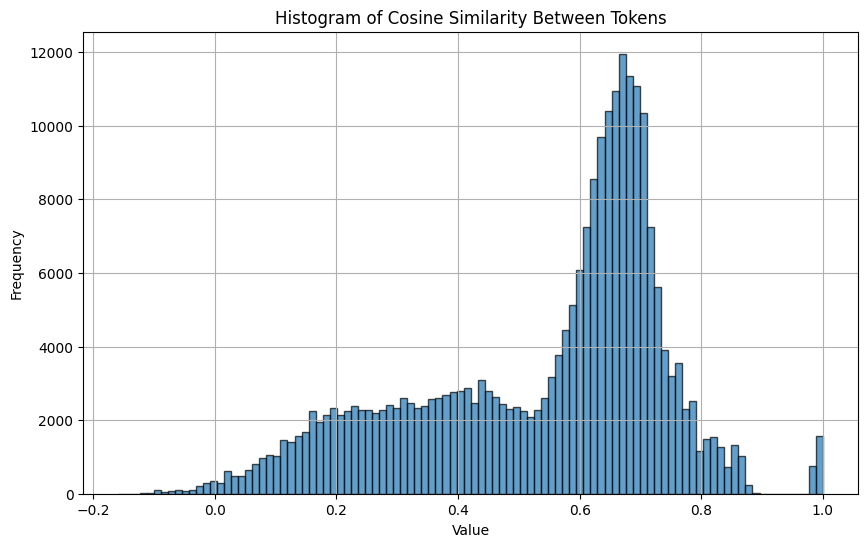

In [38]:
cosines = cosine_similarity.detach().numpy().flatten()

print(np.mean(cosines))
print(np.var(cosines))

n_bins = 100
counts, bin_edges = np.histogram(cosines, bins=n_bins)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(cosines, bins=bin_edges, edgecolor='black', alpha=0.7)
plt.title('Histogram of Cosine Similarity Between Tokens')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig("token_token_cosines_hist.png", bbox_inches='tight')


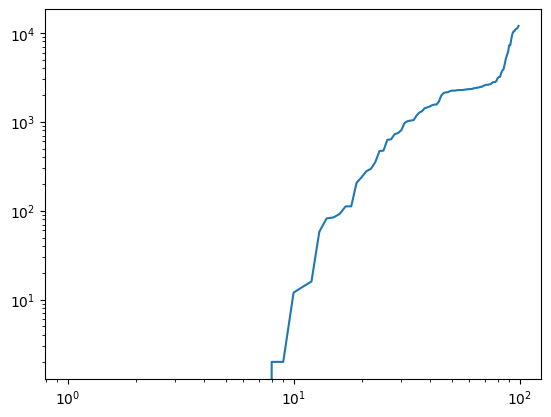

In [39]:
counts.sort()
plt.loglog(counts)

# fig = plt.figure()
# ax = fig.add_subplot(2, 1, 1)

# line, = ax.plot(counts, color='blue', lw=2)

# ax.log('log')


In [40]:
!pip install -U sentence-transformers

from sentence_transformers import SentenceTransformer


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [41]:
model = SentenceTransformer('all-mpnet-base-v2')


In [42]:
N = 5000  # Adjust this number based on your computational resources
K = 100  # You can change this number to plot more or fewer top words
start = 150
word_counts = Counter()
raw_book = ""

file_path = "/kaggle/input/project-gutenbergs-top-20-books/A_Tale_of_Two_Cities_by_Charles_Dickens.rtf"
with open(file_path, 'r', encoding='utf-8') as f:
    for i, line in enumerate(f):
        # For large files, limit the number of lines processed
        if i < start:
            continue
        if i >= start+N:
            break
        # Remove leading/trailing whitespace
        line = line.strip()
        # Skip empty lines
        if not line:
            continue
        # # Convert to lowercase
        line = line.replace("\\", " ")
        # line = line.lower()
        # # Remove punctuation and non-word characters
        # Split into words
        words = line.split()
        # Update word counts
        word_counts.update(words)
        # Print progress every 100,000 lines
        if (i + 1) % 100000 == 0:
            print(f"Processed {i + 1} lines.")
        raw_book += line

# Calculate the total number of tokens
total_tokens = sum(word_counts.values())

# Print the total token count
print(f"\nTotal number of tokens processed: {total_tokens}")

# Print the most common words
print("\nMost common words:")
for word, freq in word_counts.most_common(10):
    print(f"{word}: {freq}")

# Plot frequency vs. rank for the top K words
top_k_words = word_counts.most_common(K)
words, frequencies = zip(*top_k_words)
ranks = np.arange(1, K + 1)

all_K = len(word_counts)
all_words, all_frequencies = zip(*(word_counts.most_common(all_K)))
all_ranks = np.arange(1, all_K + 1)
inverse_all_ranks = (1 / all_ranks) 
print(all_K)
print(inverse_all_ranks[:10])
# print(raw_book)


Total number of tokens processed: 44007

Most common words:
the: 2492
and: 1491
of: 1329
to: 1033
a: 967
'94: 837
in: 755
his: 656
was: 575
that: 484
8908
[1.         0.5        0.33333333 0.25       0.2        0.16666667
 0.14285714 0.125      0.11111111 0.1       ]


In [43]:
embedded_chapter = model.encode(raw_book, show_progress_bar=False)


In [44]:
# cosine_sims = np.zeros(K)
# for i in range(K):
cosine_sims = np.zeros(all_K)
for i in tqdm(range(all_K)):

    word = all_words[i]
    word_embedding = model.encode(word,show_progress_bar = False)
    cosine_sims[i] = model.similarity(word_embedding, embedded_chapter)


100%|██████████| 8908/8908 [10:30<00:00, 14.14it/s]


In [45]:
top_cosine_sims = np.zeros(K)
for i in tqdm(range(K)):

    word = words[i]
    word_embedding = model.encode(word,show_progress_bar = False)
    top_cosine_sims[i] = model.similarity(word_embedding, embedded_chapter)


100%|██████████| 100/100 [00:06<00:00, 14.37it/s]


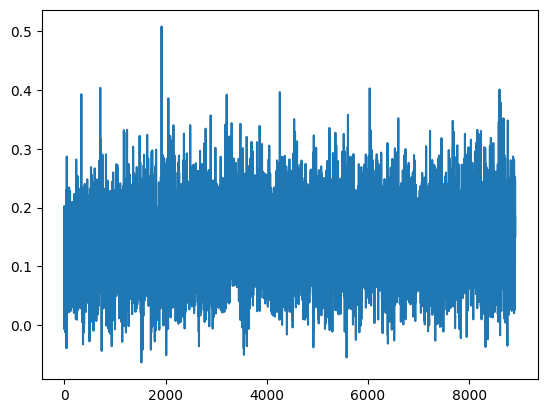

In [46]:
plt.plot(np.arange(all_K),cosine_sims.flatten())
plt.show()

mean: 0.11996099864132702
var: 0.0029119012588065974


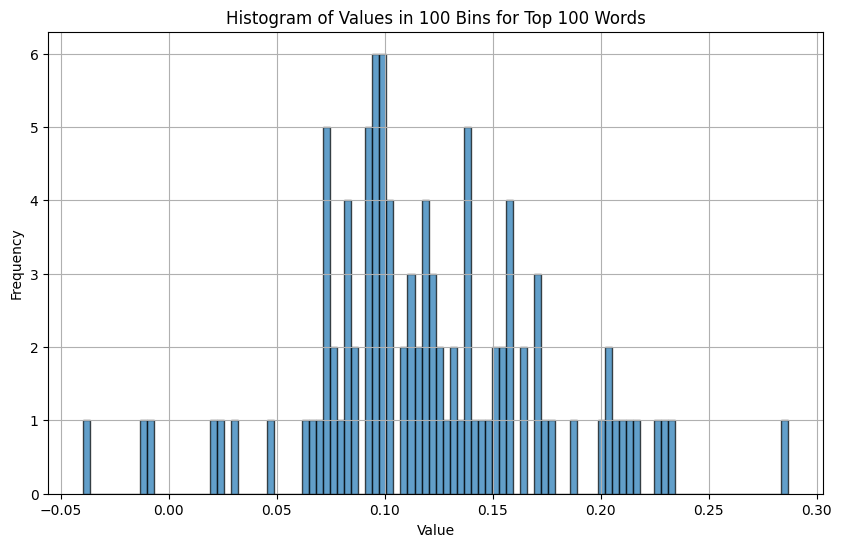

In [47]:
n_bins = 100
counts, bin_edges = np.histogram(top_cosine_sims, bins=n_bins)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(top_cosine_sims, bins=bin_edges, edgecolor='black', alpha=0.7)
plt.title('Histogram of Values in 100 Bins for Top 100 Words')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig("top_hist_no_fit.png", bbox_inches='tight')

var = np.var(top_cosine_sims)
mean = np.mean(top_cosine_sims)
print(f"mean: {mean}")
print(f"var: {var}")

mean: 0.14085417721119634
var: 0.0039497362352454435


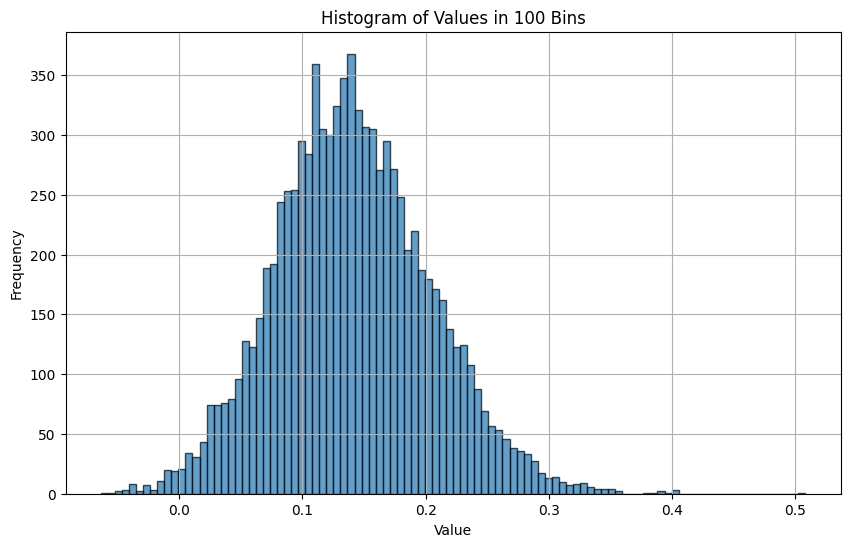

In [48]:
n_bins = 100
counts, bin_edges = np.histogram(cosine_sims, bins=n_bins)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(cosine_sims, bins=bin_edges, edgecolor='black', alpha=0.7)
plt.title('Histogram of Values in 100 Bins')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig("all_hist_no_fit.png", bbox_inches='tight')

var = np.var(cosine_sims)
mean = np.mean(cosine_sims)
print(f"mean: {mean}")
print(f"var: {var}")

-0.6997845513120291
0.14085417721119634
R² for Log-Normal Fit: 0.9889
R² for Normal Fit: 0.9788


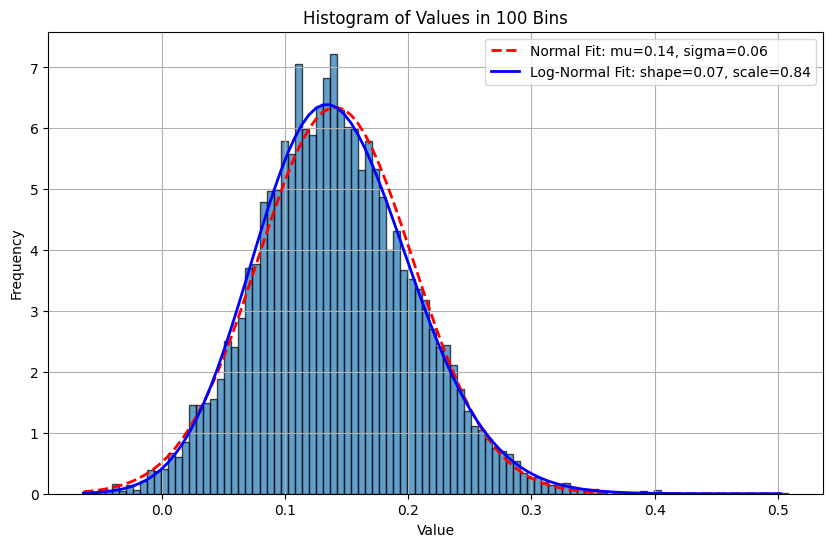

In [49]:
from scipy.stats import norm, lognorm
import matplotlib.mlab as mlab

# data = cosine_sims[cosine_sims>0]
data = cosine_sims
(mu, sigma) = norm.fit(data)

shape, loc, scale = lognorm.fit(data) 
print(loc)
print(mu)

# Plot the histogram
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(data, density=True, bins=bin_edges,  edgecolor='black', alpha=0.7)
plt.title('Histogram of Values in 100 Bins')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
y = norm.pdf( bins[:-1], mu, sigma)
l = plt.plot(bins[:-1], y, 'r--', linewidth=2, label=f"Normal Fit: mu={mu:.2f}, sigma={sigma:.2f}")

y_lognormal = lognorm.pdf(bins[:-1], shape, loc, scale)
plt.plot(bins[:-1], y_lognormal, 'b-', linewidth=2, label=f'Log-Normal Fit: shape={shape:.2f}, scale={scale:.2f}')
plt.legend()
x_axis= np.arange(0,0.6, 0.01)
# plt.plot(x_axis, norm.pdf(x_axis, mean, np.sqrt(var)))

residuals = n - y_lognormal
# Residual sum of squares (SS_res)
ss_res = np.sum(residuals**2)
# Total sum of squares (SS_tot)
ss_tot = np.sum((n - np.mean(n))**2)
# R² calculation
r_squared = 1 - (ss_res / ss_tot)
print(f'R² for Log-Normal Fit: {r_squared:.4f}')

residuals = n - y
# Residual sum of squares (SS_res)
ss_res = np.sum(residuals**2)
# Total sum of squares (SS_tot)
ss_tot = np.sum((n - np.mean(n))**2)
# R² calculation
r_squared = 1 - (ss_res / ss_tot)
print(f'R² for Normal Fit: {r_squared:.4f}')


plt.savefig("all_hist_fitted.png", bbox_inches='tight')


R² for Log-Normal Fit: 0.6029
R² for Normal Fit: 0.5967


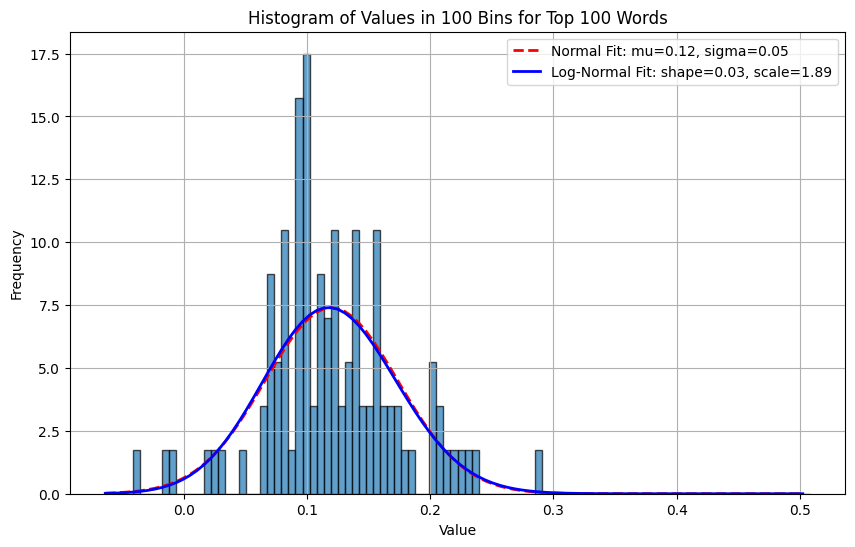

In [50]:

# data = cosine_sims[cosine_sims>0]
data = top_cosine_sims
(mu, sigma) = norm.fit(data)
shape, loc, scale = lognorm.fit(data) 

# Plot the histogram
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(data, density=True, bins=bin_edges,  edgecolor='black', alpha=0.7)
plt.title('Histogram of Values in 100 Bins for Top 100 Words')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
y = norm.pdf( bins[:-1], mu, sigma)
l = plt.plot(bins[:-1], y, 'r--', linewidth=2, label=f"Normal Fit: mu={mu:.2f}, sigma={sigma:.2f}")

y_lognormal = lognorm.pdf(bins[:-1], shape, loc, scale)
plt.plot(bins[:-1], y_lognormal, 'b-', linewidth=2, label=f'Log-Normal Fit: shape={shape:.2f}, scale={scale:.2f}')
plt.legend()
x_axis= np.arange(0,0.6, 0.01)
# plt.plot(x_axis, norm.pdf(x_axis, mean, np.sqrt(var)))

residuals = n - y_lognormal
# Residual sum of squares (SS_res)
ss_res = np.sum(residuals**2)
# Total sum of squares (SS_tot)
ss_tot = np.sum((n - np.mean(n))**2)
# R² calculation
r_squared = 1 - (ss_res / ss_tot)
print(f'R² for Log-Normal Fit: {r_squared:.4f}')

residuals = n - y
# Residual sum of squares (SS_res)
ss_res = np.sum(residuals**2)
# Total sum of squares (SS_tot)
ss_tot = np.sum((n - np.mean(n))**2)
# R² calculation
r_squared = 1 - (ss_res / ss_tot)
print(f'R² for Normal Fit: {r_squared:.4f}')

plt.savefig("top_hist_fitted.png", bbox_inches='tight')


R² for Log-Normal Fit: 0.5310
R² for Normal Fit: 0.5343


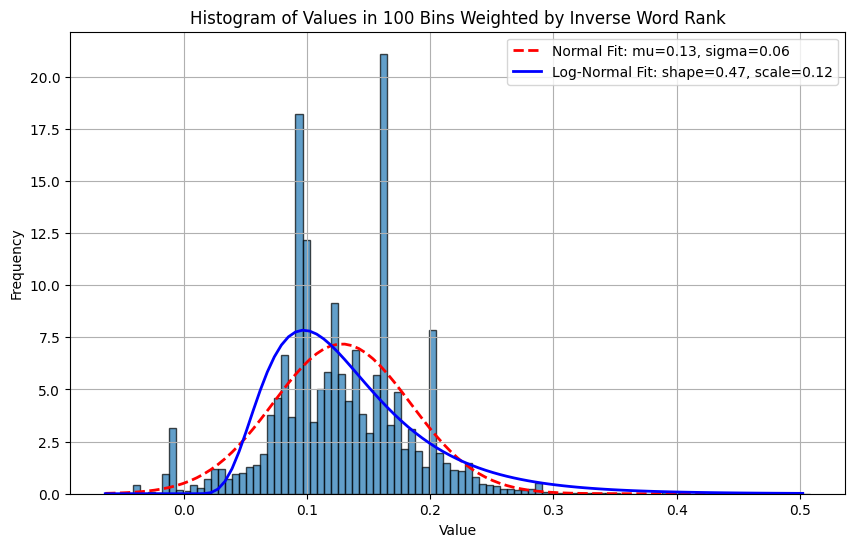

In [51]:
# now consider weighting inversly to rank
data = cosine_sims

lnx = np.log(data[data>0])
muhat = np.average(lnx, weights=inverse_all_ranks[data>0])
varhat = np.average((lnx - muhat)**2, weights=inverse_all_ranks[data>0])
shape = np.sqrt(varhat)
scale = np.exp(muhat)
loc = 0


mu = np.average(data, weights=inverse_all_ranks)
sigma = np.sqrt(np.cov(data, aweights=inverse_all_ranks))


# Plot the histogram
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(data, density=True, bins=bin_edges,  edgecolor='black', alpha=0.7, weights=inverse_all_ranks)
plt.title('Histogram of Values in 100 Bins Weighted by Inverse Word Rank')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
y = norm.pdf( bins[:-1], mu, sigma)
l = plt.plot(bins[:-1], y, 'r--', linewidth=2, label=f"Normal Fit: mu={mu:.2f}, sigma={sigma:.2f}")

y_lognormal = lognorm.pdf(bins[:-1], shape, loc, scale)
plt.plot(bins[:-1], y_lognormal, 'b-', linewidth=2, label=f'Log-Normal Fit: shape={shape:.2f}, scale={scale:.2f}')
plt.legend()
x_axis= np.arange(0,0.6, 0.01)
# plt.plot(x_axis, norm.pdf(x_axis, mean, np.sqrt(var)))


residuals = n - y_lognormal
# Residual sum of squares (SS_res)
ss_res = np.sum(residuals**2)
# Total sum of squares (SS_tot)
ss_tot = np.sum((n - np.mean(n))**2)
# R² calculation
r_squared = 1 - (ss_res / ss_tot)
print(f'R² for Log-Normal Fit: {r_squared:.4f}')

residuals = n - y
# Residual sum of squares (SS_res)
ss_res = np.sum(residuals**2)
# Total sum of squares (SS_tot)
ss_tot = np.sum((n - np.mean(n))**2)
# R² calculation
r_squared = 1 - (ss_res / ss_tot)
print(f'R² for Normal Fit: {r_squared:.4f}')


plt.savefig("all_hist_inverse.png", bbox_inches='tight')


R² for Log-Normal Fit: 0.8394
R² for Normal Fit: 0.9775


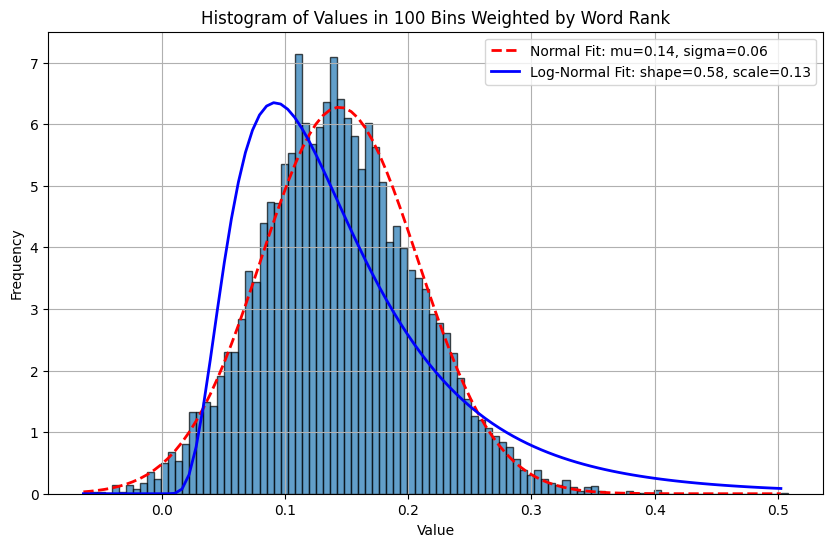

In [52]:
# or weighting  by rank
data = cosine_sims
mu = np.average(data, weights=all_ranks)
sigma = np.sqrt(np.cov(data, aweights=all_ranks))

lnx = np.log(data[data>0])
muhat = np.average(lnx, weights=all_ranks[data>0])
varhat = np.average((lnx - muhat)**2, weights=all_ranks[data>0])
loc = 0.00
shape = np.sqrt(varhat)
scale = np.exp(muhat)


# Plot the histogram
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(data, density=True, bins=bin_edges,  edgecolor='black', alpha=0.7, weights=all_ranks)
plt.title('Histogram of Values in 100 Bins Weighted by Word Rank')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
y = norm.pdf( bins[:-1], mu, sigma)
l = plt.plot(bins[:-1], y, 'r--', linewidth=2, label=f"Normal Fit: mu={mu:.2f}, sigma={sigma:.2f}")

y_lognormal = lognorm.pdf(bins[:-1], shape, loc, scale)
plt.plot(bins[:-1], y_lognormal, 'b-', linewidth=2, label=f'Log-Normal Fit: shape={shape:.2f}, scale={scale:.2f}')
plt.legend()
x_axis= np.arange(0,1, 0.01)
# plt.plot(x_axis, norm.pdf(x_axis, mean, np.sqrt(var)))

residuals = n - y_lognormal
# Residual sum of squares (SS_res)
ss_res = np.sum(residuals**2)
# Total sum of squares (SS_tot)
ss_tot = np.sum((n - np.mean(n))**2)
# R² calculation
r_squared = 1 - (ss_res / ss_tot)
print(f'R² for Log-Normal Fit: {r_squared:.4f}')

residuals = n - y
# Residual sum of squares (SS_res)
ss_res = np.sum(residuals**2)
# Total sum of squares (SS_tot)
ss_tot = np.sum((n - np.mean(n))**2)
# R² calculation
r_squared = 1 - (ss_res / ss_tot)
print(f'R² for Normal Fit: {r_squared:.4f}')




plt.savefig("all_hist_ranked.png", bbox_inches='tight')
